In [1]:
#%pylab inline
#pylab.rcParams['figure.figsize'] = (10, 6)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
import random
from random import randint
from collections import OrderedDict,Counter

Preprocess Data:
Remove -C, Rename headers

In [2]:
data = 'DECEMBER 15-Main View.csv'
df = pd.read_csv(data)

wellgos = []
for idx,line in enumerate(df['WELLGORITHM - choose primary + top 3-5']):
    wgs = [wg for wg in line.split(',') if not re.match(r'.*-[C|c]$',wg)]
    wellgos.append(','.join(wgs))
df['WELLGORITHM - choose primary + top 3-5'] = wellgos


df.rename(columns={'\ufeffRAW WRITINGS - complete paragraphs / block answers':'RAW',
                   'GENERAL CATS - choose top 3-5': 'CATS',
                   'WELLGORITHM - choose primary + top 3-5': 'WELLGOS',
                   'n': 'N',
                   'gender': 'GENDER'
                  },inplace=True)

df.to_csv('data_-c_removed.csv',index=False)

# Heading

In [2]:
data = 'data_-c_removed.csv'
df = pd.read_csv(data)

In [3]:
c_welg = Counter()

for idx,welg in enumerate(df['WELLGOS']):
    c_welg.update(welg.split(','))

In [4]:
c_male = Counter()
c_fema = Counter()

for welg,gen in zip(df['WELLGOS'],df['GENDER']):
    if gen == 'male':
        c_male.update(welg.split(','))
    if gen == 'female':
        c_fema.update(welg.split(','))

In [5]:
c_male['VULNERABILITY / mistakes & learning']

4

In [6]:
c_fema

Counter({'"20000 Foot Viewer"': 1,
         'ADMIT / Decisions & beliefs': 9,
         'ADMIT / True self & vulnerability': 7,
         'ADMIT / accountability': 21,
         'ADMIT / healing': 9,
         'ADMIT / honesty': 14,
         'Abstainer Amazer': 15,
         'Addiction AMF’r': 18,
         'Adversity Adventurer': 5,
         'Adversity Avenger': 5,
         'Adversity Ninja': 5,
         'Agape ASAP’r': 1,
         'Aggravation Vacationer': 2,
         'Alienation Alleviationator': 2,
         'Almighty Alchemizer': 15,
         'Amender Amen’r': 6,
         'Amender Befriender': 7,
         'Anger Gangster': 3,
         'Anger Ionizer': 1,
         'Anger Rinser': 2,
         'Anger Vacationer': 1,
         'Anger X’r': 1,
         'Angerexia': 2,
         'Anxiety Elixir': 1,
         'Anxiety Exiler': 1,
         'Anxiety X-terminator': 2,
         'Apology Amen’r': 1,
         'Arrogance Arrestor': 4,
         'Assumption Assassinator': 1,
         'Attitude Alchemizer'

In [7]:
df_gender_welgo = pd.DataFrame()

df_gender_welgo['WELGOS'] = sorted(c_welg.keys())

df_gender_welgo['MALE'] = np.zeros(len(df_gender_welgo['WELGOS']))
df_gender_welgo['FEMALE'] = np.zeros(len(df_gender_welgo['WELGOS']))

for idx,welgo in enumerate(df_gender_welgo['WELGOS']):
    #df_gender_welgo['MALE'][idx] = c_male[welgo]
    #df_gender_welgo['FEMALE'][idx] = c_fema[welgo]
    df_gender_welgo.loc[df_gender_welgo['WELGOS'] == welgo, 'MALE'] = c_male[welgo]
    df_gender_welgo.loc[df_gender_welgo['WELGOS'] == welgo, 'FEMALE'] = c_fema[welgo]

In [8]:
df_gender_welgo

,WELGOS,MALE,FEMALE
0,"""20000 Foot Viewer""",0,1
1,ADMIT / Decisions & beliefs,3,9
2,ADMIT / True self & vulnerability,2,7
3,ADMIT / accountability,5,21
4,ADMIT / healing,3,9
5,ADMIT / honesty,5,14
6,Abstainer Amazer,3,15
7,Addiction AMF’r,6,18
8,Adversity Adventurer,0,5
9,Adversity Avenger,1,5


In [9]:
df_gender_welgo.to_csv('WELGOS_vs_GENDER_total.csv',index=False)

In [10]:
Counter(df['GENDER'])

Counter({'female': 578, 'male': 207})

In [11]:
df_fema = df.loc[df['GENDER'] == 'female']

In [12]:
rows = random.sample(df_fema.index.tolist(), 207)

In [13]:
df_rand_fema = df_fema.ix[rows]

In [14]:
df_male = df.loc[df['GENDER'] == 'male']

In [15]:
df_rand_fema

,RAW,CATS,WELLGOS,FOCUS,N,GENDER
121,I have learned that I am able to erode any urg...,"SOBRIETY / celebrate & progress,URGES / tools ...","Urge X’r,New Pattern Painter / confidence & aw...",DRUGS/ALC,Jen,female
93,My motivation for change traces all the way ba...,"EMOTIONS,CHANGE / motivations,MINDSET / no mat...","Emotions X-rayer,Feelings Fantasizer,Killer Ki...",DRUGS/ALC,Jen,female
35,I cannot make decisions on the drop of a hat w...,"BENEFITS / COSTS,MINDSET / obstacles & challen...","Instinct Interrogator,Gut Gutter,Mentality Men...",DRUGS/ALC,Jen,female
210,I nip negative thoughts in the bud whenever th...,"CHANGE / action & behavior,CONFIDENCE / hope ...","The Wellectrifier,Negativity Ninja,Inner Motor...",DRUGS/ALC,Alys,female
728,Condemning people by constantly judging them i...,"GROWTH / motivation & boosts,JEALOUSY,JUDGMENTS","Judgment Junker,Lack Hacker,Jealousy Jolter,In...",FOOD,Shar,female
172,There were times while using that I did want t...,"WORTHINESS / new life & future,GRATITUDE / opp...","Dead End Defier ,The Hopenotizer,Faith Flooder...",DRUGS/ALC,Alys,female
227,This goes back to acceptance. And it is import...,"SITUATIONS,MINDSET / obstacles & challenge,INN...","Situation Unscrewer,Inner Power Allower,Advers...",DRUGS/ALC,Alys,female
44,Recalling my lowest point elevates my mood. Th...,"MOTIVATION,URGES / moods & emotions,INNER / SE...","The Soulutionizer,Low Vibration Lifter,Killer ...",DRUGS/ALC,Jen,female
685,The serenity and peace that comes from my conn...,"FREEDOM / past & let go,CONFIDENCE / hope & f...","Miracle Embracer,Blessings Bather,Serenity Sou...",FOOD,Shar,female
212,After getting a taste of what sobriety has to ...,"GROWTH / motivation & boosts,CONFIDENCE / hop...","NEW LIFE / POSSIBILITIES,I-Can-ographer,Killer...",DRUGS/ALC,Alys,female


In [16]:
df_male

,RAW,CATS,WELLGOS,FOCUS,N,GENDER
122,"Throughout my drinking career, instant gratifi...","PROGRESS / start small,INNER MASTERY / take a ...","Baby Step Embracer,Finish Line Forgetter,The M...",DRUGS/ALC,Paul,male
123,I tried to control every aspect of my life. Wh...,"CONTROL,SERENITY,FREEDOM / past & let go,TRUST...","Controller Coaster,Should Shover,Serenity Simu...",DRUGS/ALC,Paul,male
124,Thinking about drinking – the taste and feel –...,"CRAVINGS / will power & tools,INNER POWER / Se...","Pattern Interrupter,New Pattern Painter,Craver...",DRUGS/ALC,Paul,male
125,I always thought today/this weekend/this week ...,"DELUSION,CONFESSION / denial,TRUTH / self honesty","Delusion Detector,Sabotage SOS’r,Insanity SOS’...",DRUGS/ALC,Paul,male
126,The people around me only saw what I wanted th...,"CONFIDENCE / acceptance & worth,DELUSION,VULNE...","Self Esteem Elixir,Confidence Caffeinator,Inne...",DRUGS/ALC,Paul,male
127,Resigned to the fact that being poor or homele...,"CONFIDENCE / hope & future,FREEDOM / past & l...","Excuse Exterminator,Rationalization Rinser,Gra...",DRUGS/ALC,Paul,male
128,"Alcohol was great for two things, suppressing ...","WORTHINESS / connections & sharing,VULNERABILI...","Emotions Engineer,Feelings Fantasizer,Compassi...",DRUGS/ALC,Paul,male
129,I’ve started more things than I can count and ...,"COMMITMENTS,MOTIVATION,RESPONSIBILITY,INNER PO...","Finish Line Forgetter,The Procrastina-shunner,...",DRUGS/ALC,Paul,male
130,How great it was to have a friend that I could...,"EGO,PRIDE ,INFLUENCES,COMMUNITY / healthy rela...","Foul Weather Friender,Arrogance Arrestor,Pride...",DRUGS/ALC,Paul,male
131,Diving headlong into whatever had caught my in...,"COMMITMENTS,PROGRESS / start small,INNER POWER...","Symbolic Stepper,New Pattern Painter / grit & ...",DRUGS/ALC,Paul,male


In [17]:
df_evenG_dist = pd.concat([df_male,df_rand_fema],ignore_index=True)

In [18]:
df_evenG_dist.to_csv('GenderEven207.csv',index=False)

In [19]:
c_maleEven = Counter()
c_femaEven = Counter()

for welg,gen in zip(df_evenG_dist['WELLGOS'],df_evenG_dist['GENDER']):
    if gen == 'male':
        c_maleEven.update(welg.split(','))
    if gen == 'female':
        c_femaEven.update(welg.split(','))



df_genderEven_welgo = pd.DataFrame()

df_genderEven_welgo['WELGOS'] = sorted(c_welg.keys())

df_genderEven_welgo['MALE'] = np.zeros(len(df_genderEven_welgo['WELGOS']))
df_genderEven_welgo['FEMALE'] = np.zeros(len(df_genderEven_welgo['WELGOS']))

for idx,welgo in enumerate(df_genderEven_welgo['WELGOS']):
    #df_gender_welgo['MALE'][idx] = c_male[welgo]
    #df_gender_welgo['FEMALE'][idx] = c_fema[welgo]
    df_genderEven_welgo.loc[df_genderEven_welgo['WELGOS'] == welgo, 'MALE'] = c_maleEven[welgo]
    df_genderEven_welgo.loc[df_genderEven_welgo['WELGOS'] == welgo, 'FEMALE'] = c_femaEven[welgo]

In [20]:
df_genderEven_welgo['DIF'] = df_genderEven_welgo['MALE'] - df_genderEven_welgo['FEMALE']

In [22]:
df_genderEven_welgo.to_csv('Gender_vs_Welgos-EvenDist.csv',index=False)

In [21]:
df_genderEven_welgo

,WELGOS,MALE,FEMALE,DIF
0,"""20000 Foot Viewer""",0,0,0
1,ADMIT / Decisions & beliefs,3,4,-1
2,ADMIT / True self & vulnerability,2,2,0
3,ADMIT / accountability,5,8,-3
4,ADMIT / healing,3,3,0
5,ADMIT / honesty,5,3,2
6,Abstainer Amazer,3,5,-2
7,Addiction AMF’r,6,8,-2
8,Adversity Adventurer,0,4,-4
9,Adversity Avenger,1,3,-2


In [150]:
def plotGenderDist(df,space):
    
    x_cords = df['DIF']
    y_cords = [0] * df.shape[0]
    size = [s*50 for s in (df['MALE'] + df['FEMALE'])]
    
    labels = df.index#[s.split('/')[0] for s in df['WELGOS']]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    plt.scatter(x_cords, y_cords, s=size, marker='o')
    axdict = {}
    for (l,(x,y)) in zip(labels,zip(x_cords,y_cords)):
        if (x,y) not in axdict:
            ax.annotate(l,xy=(x,y),rotation=45,xytext=(x,y-0.004))
            axdict.update({(x,y):(x,y)})
        else:
            x,y = axdict[(x,y)]
            newx,newy = x,y-space
            ax.annotate(l,xy=(newx,newy),rotation=45,xytext=(newx,newy))
            axdict.update({(x,y):(newx,newy)})
        
    plt.show()

In [36]:
df_threshld = df_genderEven_welgo.loc[(df_genderEven_welgo['DIF'] > 6) | (df_genderEven_welgo['DIF'] < -4)]

In [112]:
df_threshld.to_csv('GenderPolar-Welgos.csv')

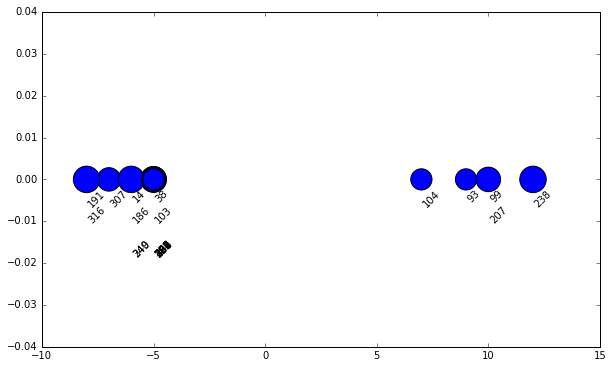

In [151]:
plotGenderDist(df_threshld,0.008)

In [24]:
df_sorted = df_genderEven_welgo.sort_values(['DIF'], ascending=[True])

Populating the interactive namespace from numpy and matplotlib


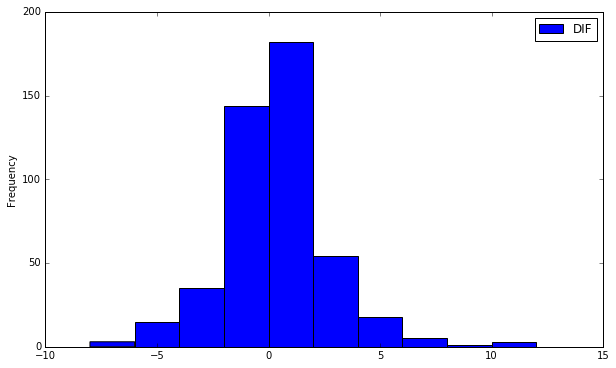

In [41]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
df_sorted['DIF'].plot('hist',legend='male')

(1, 2, 0, 3)